f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

Определить корни
Найти интервалы, на которых функция возрастает
Найти интервалы, на которых функция убывает
Построить график
Вычислить вершину
Определить промежутки, на котором f > 0
Определить промежутки, на котором f < 0



In [2]:
import sympy
from sympy.plotting import plot
from sympy import sin
from sympy import cos


In [3]:
x = sympy.Symbol('x')
f_x = - 12 * x ** 4 * sin(cos(x)) - 18 * x ** 3 + 5 * x ** 2 + 10 * x - 30
print(f_x)


-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30


In [4]:
# for root in sympy.solve(f_x, x): # найти корни
#     print(root)


NotImplementedError: multiple generators [x, sin(cos(x))]
No algorithms are implemented to solve equation -12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30

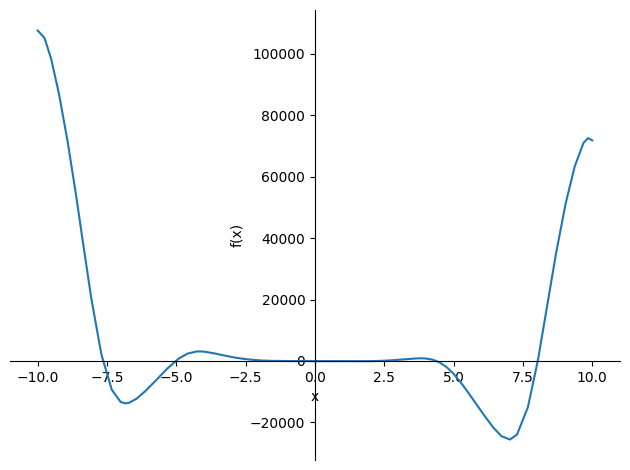

In [5]:
plot(f_x)


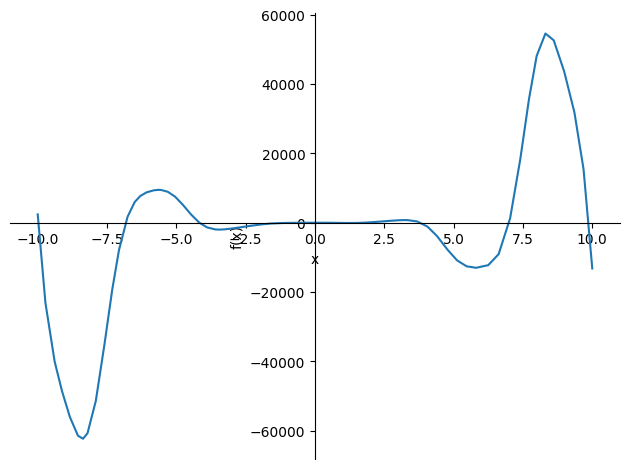

In [6]:
f_x_diff = f_x.diff()
plot(f_x_diff)

In [9]:
def calc_func_intervals(i, j, accuracy): # Грубо находим точки пересечения функции с осью х - получаем ряд диапазонов х.
    i = i * 10**accuracy
    j = j * 10**accuracy
    keys = []
    for count in range(int(i), int(j)):
        func_1 = f_x.subs(x, count / 10 ** accuracy)
        func_2 = f_x.subs(x, count / 10 ** accuracy + 1/10 ** accuracy)
        
        if func_1 * func_2 < 0:
            interval = [count / 10 ** accuracy, count / 10 ** accuracy + 1/10 ** accuracy]
            keys.append(interval)
            print("x = {}, y = {} \nx = {}, y = {}".format(count / 10 ** accuracy, float(func_1), count / 10 ** accuracy + 1/10 ** accuracy, float(func_2)))
    
    return keys

    
intervals = calc_func_intervals(-10, 10, 1)
print(intervals)


x = -7.7, y = 1962.5106956241507 
x = -7.6000000000000005, y = -1869.2147789596347
x = -5.1, y = -559.2016424258545 
x = -5.0, y = 195.94986923604483
x = -1.4, y = 7.3943219095616755 
x = -1.2999999999999998, y = -4.063093893349553
x = 2.2, y = -19.41720035263225 
x = 2.3000000000000003, y = 7.9951585211397855
x = 4.3, y = 274.95591003248387 
x = 4.3999999999999995, y = -61.87418574555795
x = 8.0, y = -1719.5892422981788 
x = 8.1, y = 3269.646557506563
[[-7.7, -7.6000000000000005], [-5.1, -5.0], [-1.4, -1.2999999999999998], [2.2, 2.3000000000000003], [4.3, 4.3999999999999995], [8.0, 8.1]]


In [10]:
def calc_func_zero(i, j, acc, accuracy):
#     acc = (j - i) / 10
    i = i / acc
    j = j / acc
    print('i = ', i)
    print('j = ', j)
    print('acc = ', acc)
    for count in range(int(i), int(j)):
        func_1 = f_x.subs(x, count * acc)
        func_2 = f_x.subs(x, count * acc + acc)
        print("Count = {}, acc = {}".format(count, acc))
        print("acc = {}, func_1 = {}, func_2 = {}".format(acc, func_1, func_2))

        if func_1 * func_2 < 0:
            if func_2 - func_1 < accuracy:
                print("Return:", count * acc)
                return [count * acc, func_1]
            else:
                x_01 = round(count * acc, len(str(abs(count))))
                x_02 = round(count * acc + acc, len(str(abs(count)))) 
                acc = round((x_01 - x_02) / 10, len(str(abs(count))))
                print("Recurse: ", x_01, ", ", x_02)
                calc_func_zero(x_01, x_02, acc, accuracy)
                
    
for interval in intervals:
    print(interval)
    x_0_parameter = calc_func_zero(interval[0], interval[1], 0.1, 0.0001)
    print("x = {}, y = {}".format(x_0_parameter[0], x_0_parameter[1]))

[-7.7, -7.6000000000000005]
i =  -77.0
j =  -76.0
acc =  0.1
Count = -77, acc = 0.1
acc = 0.1, func_1 = 1962.51069562415, func_2 = -1869.21477895963
Return: -7.7
x = -7.7, y = 1962.51069562415
[-5.1, -5.0]
i =  -50.99999999999999
j =  -50.0
acc =  0.1


TypeError: 'NoneType' object is not subscriptable

x = 0.43372829